In [3]:
# Step 1: Install required libraries
!pip install facenet-pytorch opencv-python torch torchvision matplotlib

In [ ]:
!pip install keras

Using device: cuda
Detected 1 faces in the image.


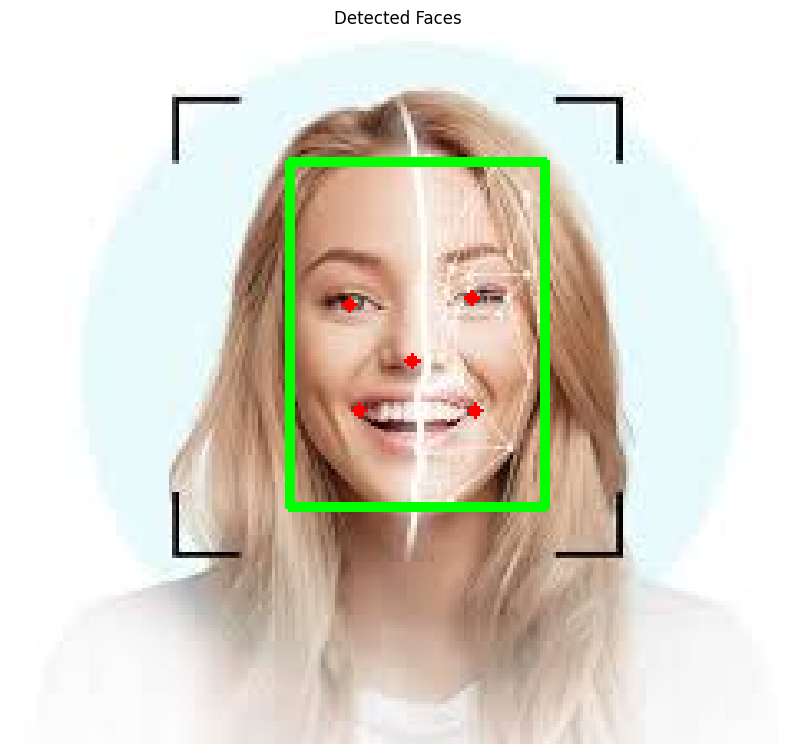

Number of cropped faces stored in memory: 1


In [ ]:
# Step 1: Import libraries
import cv2
import torch
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image

# Step 2: Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Step 3: Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True, device=device)



# Get the uploaded image file name
image_path = "/content/ha.jpg"

# Step 5: Load and preprocess the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB

# Step 6: Detect faces using MTCNN
boxes, _, landmarks = mtcnn.detect(image_rgb, landmarks=True)

# Step 7: Store cropped faces in memory (for passing to classification model)
cropped_faces = []

# Step 8: Visualize detected faces
if boxes is not None:
    print(f"Detected {len(boxes)} faces in the image.")

    # Create a copy of the image for visualization
    image_with_boxes = image_rgb.copy()

    # Loop through each detected face
    for i, box in enumerate(boxes):
        # Get bounding box coordinates
        x1, y1, x2, y2 = [int(coord) for coord in box]

        # Draw bounding box on the image
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw facial landmarks (e.g., eyes, nose, mouth)
        if landmarks is not None:
            for point in landmarks[i]:
                cv2.circle(image_with_boxes, (int(point[0]), int(point[1])), 2, (255, 0, 0), -1)

        # Crop the face and store it in memory
        face = image_rgb[y1:y2, x1:x2]
        face_pil = Image.fromarray(face)
        cropped_faces.append(face_pil)

    # Step 9: Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.title('Detected Faces')
    plt.show()

else:
    print("No faces detected in the image.")

# Step 10: The cropped_faces list contains the cropped face images (PIL format)
# You can pass these to your classification model for emotion detection
print(f"Number of cropped faces stored in memory: {len(cropped_faces)}")

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas

Model loaded successfully
Detected 1 faces in the image.
(1, 48, 48, 1)
float64
1/1 [==============================] - 0s 329ms/step


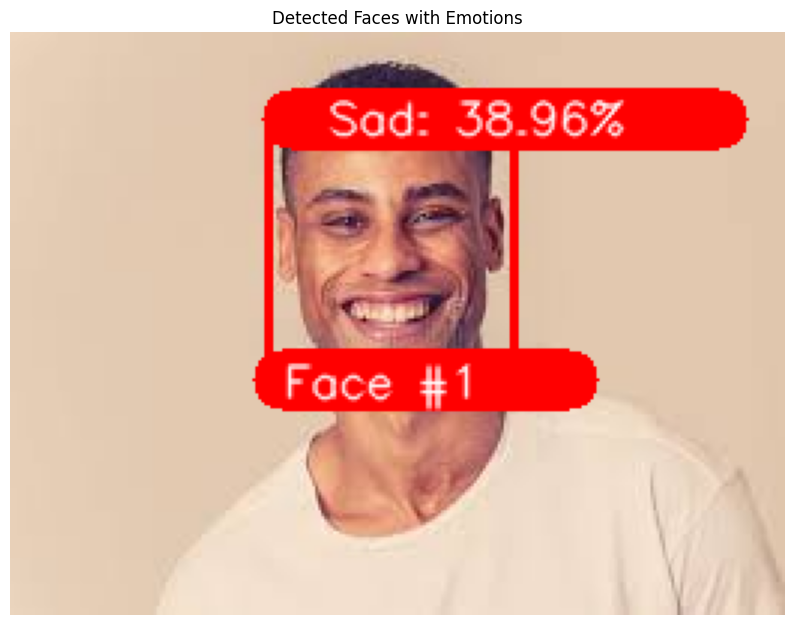

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow import keras # Import keras from tensorflow


# Step 4: Load the pre-trained model
model = keras.models.load_model('/content/FER_model.h5') # Load using keras from tensorflow
print("Model loaded successfully")

# Step 5: Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 6: Define emotion dictionary and colors (from your notebook)
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
colour_cycle = ((255, 0, 0), (0, 255, 0), (0, 0, 255), (230, 230, 250))

# Step 7: Define the predict_emotion function (adapted from your notebook)
def predict_emotion(gray, x, y, w, h):
    face = np.expand_dims(np.expand_dims(np.resize(gray[y:y+w, x:x+h]/255.0, (48, 48)), -1), 0)
    print(face.shape)  # Check if the shape is as expected (1, 48, 48, 1)
    print(face.dtype)  # Check if the data type is correct (e.g., float32)
    prediction = model.predict([face])
    return (int(np.argmax(prediction)), round(max(prediction[0])*100, 2))

# Get the uploaded image file name
image_path = "/content/h.jpg"

# Step 9: Load and preprocess the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection

# Step 10: Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Step 11: Predict emotions and draw bounding boxes
if len(faces) > 0:
    print(f"Detected {len(faces)} faces in the image.")

    # Loop through each detected face
    for count, (x, y, w, h) in enumerate(faces):
        # Predict emotion for the face
        emotion_id, confidence = predict_emotion(gray, x, y, w, h)
        emotion = emotion_dict[emotion_id]

        # Select color for the bounding box
        colour = colour_cycle[int(count % len(colour_cycle))]

        # Draw bounding box and emotion label on the image
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), colour, 2)
        cv2.line(image_rgb, (x+5, y+h+5), (x+100, y+h+5), colour, 20)
        cv2.putText(image_rgb, f"Face #{count+1}", (x+5, y+h+11), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)
        cv2.line(image_rgb, (x+8, y), (x+150, y), colour, 20)
        cv2.putText(image_rgb, f"{emotion}: {confidence}%", (x+20, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)

    # Step 12: Display the image with bounding boxes and emotion labels
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Detected Faces with Emotions')
    plt.show()
else:
    print("No faces detected in the image.")

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 873.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.0 MB/s eta 0:00:00
  A

Model loaded successfully
Model expects input shape: (None, 48, 48, 1)
Detected faces (Haar Cascade): [[76 24 90 90]]
Detected 1 faces in the image.
Input shape to model: (1, 48, 48, 1)
Input data type: float64
Input min/max values: 0.00392156862745098/1.0
1/1 [==============================] - 0s 209ms/step
Raw prediction: [[0.43239212 0.10065235 0.22759332 0.0416782  0.03589557 0.14779542
  0.01399305]]


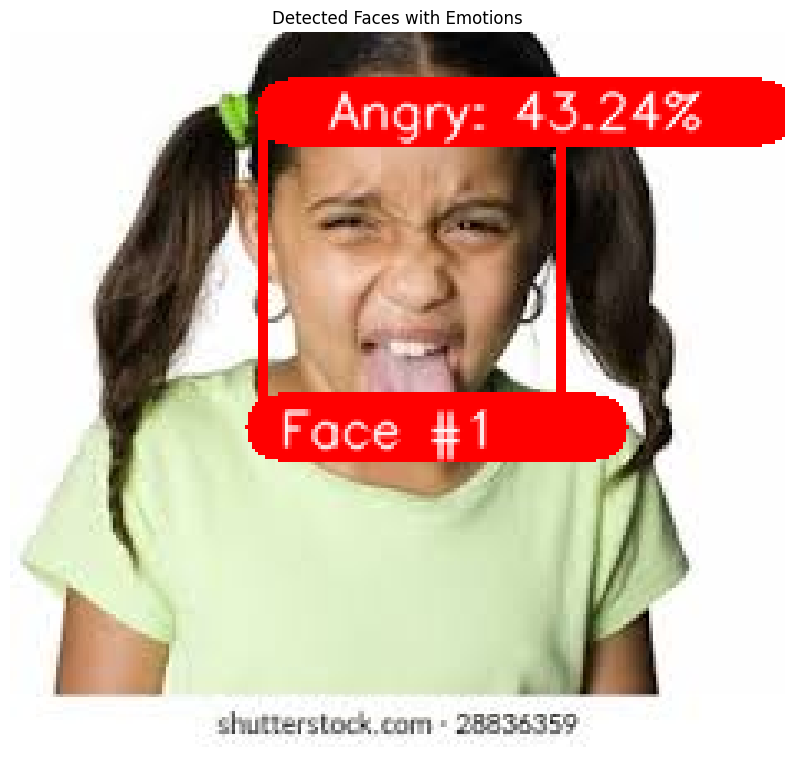

In [ ]:
# Step 1: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files

# Step 2: Load the pre-trained model
try:
    model = keras.models.load_model('/content/FER_model.h5')
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Step 3: Check the model's expected input shape
model_input_shape = model.input_shape
print(f"Model expects input shape: {model_input_shape}")

# Step 4: Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 5: Define emotion dictionary and colors (from your notebook)
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
colour_cycle = ((255, 0, 0), (0, 255, 0), (0, 0, 255), (230, 230, 250))

# Step 6: Define the predict_emotion function with debugging
def predict_emotion(gray, x, y, w, h):
    # Ensure the face region is valid
    if w <= 0 or h <= 0:
        print("Invalid face dimensions: w or h is zero or negative")
        return (0, 0.0)  # Return a default value to avoid crashing

    # Resize and preprocess the face
    face = cv2.resize(gray[y:y+h, x:x+w], (48, 48)) / 255.0
    face = np.expand_dims(np.expand_dims(face, -1), 0)  # Shape: (1, 48, 48, 1)

    # Debugging: Check shape and data type
    print(f"Input shape to model: {face.shape}")
    print(f"Input data type: {face.dtype}")
    print(f"Input min/max values: {face.min()}/{face.max()}")

    # Predict emotion
    prediction = model.predict(face)
    print(f"Raw prediction: {prediction}")

    emotion_id = int(np.argmax(prediction))
    confidence = round(max(prediction[0]) * 100, 2)
    return (emotion_id, confidence)

# Step 7: Load and preprocess the image
image_path = "/content/de.jpg"
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print(f"Error: Could not load image at {image_path}")
    print("Please upload the image manually:")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection

# Step 8: Detect faces in the image using Haar Cascade
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print(f"Detected faces (Haar Cascade): {faces}")

# Step 9: If Haar Cascade fails, try MTCNN (optional)
if len(faces) == 0:
    print("No faces detected with Haar Cascade. Trying MTCNN...")
    try:
        !pip install mtcnn
        from mtcnn import MTCNN
        detector = MTCNN()
        results = detector.detect_faces(image_rgb)
        faces = [(result['box'][0], result['box'][1], result['box'][2], result['box'][3]) for result in results]
        print(f"Detected faces (MTCNN): {faces}")
    except Exception as e:
        print(f"MTCNN failed: {e}")

# Step 10: Predict emotions and draw bounding boxes
if len(faces) > 0:
    print(f"Detected {len(faces)} faces in the image.")

    # Loop through each detected face
    for count, (x, y, w, h) in enumerate(faces):
        # Predict emotion for the face
        emotion_id, confidence = predict_emotion(gray, x, y, w, h)
        emotion = emotion_dict[emotion_id]

        # Select color for the bounding box
        colour = colour_cycle[int(count % len(colour_cycle))]

        # Draw bounding box and emotion label on the image
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), colour, 2)
        cv2.line(image_rgb, (x+5, y+h+5), (x+100, y+h+5), colour, 20)
        cv2.putText(image_rgb, f"Face #{count+1}", (x+5, y+h+11), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)
        cv2.line(image_rgb, (x+8, y), (x+150, y), colour, 20)
        cv2.putText(image_rgb, f"{emotion}: {confidence}%", (x+20, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)

    # Step 11: Display the image with bounding boxes and emotion labels
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Detected Faces with Emotions')
    plt.show()
else:
    print("No faces detected in the image.")
    # Display the image to confirm it loaded correctly
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image (No Faces Detected)')
    plt.show()

In [1]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

In [8]:
!pip uninstall -y torch torchvision facenet-pytorch
!pip install torch==2.0.1 torchvision==0.15.2 facenet-pytorch==2.5.3

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.21.0
Uninstalling torchvision-0.21.0:
  Successfully uninstalled torchvision-0.21.0
Found existing installation: facenet-pytorch 2.6.0
Uninstalling facenet-pytorch-2.6.0:
  Successfully uninstalled facenet-pytorch-2.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.4 MB/s eta 0:00:0

In [9]:
# Step 1: Import required libraries
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Step 2: Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Step 3: Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True, device=device)

# Step 4: Load the pre-trained emotion classification model
try:
    model = keras.models.load_model('/content/emotion.h5')
    print("Emotion model loaded successfully")
    print(f"Model expects input shape: {model.input_shape}")
except Exception as e:
    print(f"Error loading emotion model: {e}")
    raise

# Step 5: Define emotion dictionary and colors
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
colour_cycle = ((255, 0, 0), (0, 255, 0), (0, 0, 255), (230, 230, 250))

# Step 6: Define the predict_emotion function
def predict_emotion(face):
    # Convert PIL image to grayscale numpy array
    face_gray = cv2.cvtColor(np.array(face), cv2.COLOR_RGB2GRAY)
    # Resize and preprocess for the model (48x48 expected by FER model)
    face_resized = cv2.resize(face_gray, (48, 48)) / 255.0
    face_input = np.expand_dims(np.expand_dims(face_resized, -1), 0)  # Shape: (1, 48, 48, 1)

    # Predict emotion
    prediction = model.predict(face_input)
    emotion_id = int(np.argmax(prediction))
    confidence = round(max(prediction[0]) * 100, 2)
    return (emotion_id, confidence)

# Step 7: Load and preprocess the image
image_path = "/content/images.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    print(f"Error: Could not load image at {image_path}")
    print("Please upload the image manually:")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Step 8: Detect faces using MTCNN
boxes, _, landmarks = mtcnn.detect(image_rgb, landmarks=True)
cropped_faces = []

# Step 9: Process detected faces and predict emotions
if boxes is not None:
    print(f"Detected {len(boxes)} faces in the image.")

    # Create a copy of the image for visualization
    image_with_boxes = image_rgb.copy()

    # Loop through each detected face
    for i, box in enumerate(boxes):
        # Get bounding box coordinates
        x1, y1, x2, y2 = [int(coord) for coord in box]

        # Crop the face
        face = image_rgb[y1:y2, x1:x2]
        face_pil = Image.fromarray(face)
        cropped_faces.append(face_pil)

        # Predict emotion
        emotion_id, confidence = predict_emotion(face_pil)
        emotion = emotion_dict[emotion_id]

        # Select color for the bounding box
        colour = colour_cycle[int(i % len(colour_cycle))]

        # Draw bounding box
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), colour, 2)

        # Draw facial landmarks
        if landmarks is not None:
            for point in landmarks[i]:
                cv2.circle(image_with_boxes, (int(point[0]), int(point[1])), 2, (255, 0, 0), -1)

        # Add emotion label
        cv2.line(image_with_boxes, (x1+5, y2+5), (x1+100, y2+5), colour, 20)
        cv2.putText(image_with_boxes, f"Face #{i+1}", (x1+5, y2+11),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)
        cv2.line(image_with_boxes, (x1+8, y1), (x1+150, y1), colour, 20)
        cv2.putText(image_with_boxes, f"{emotion}: {confidence}%", (x1+20, y1+5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)

    # Step 10: Display the image with bounding boxes and emotion labels
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.title('Detected Faces with Emotions')
    plt.show()

else:
    print("No faces detected in the image.")
    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image (No Faces Detected)')
    plt.show()

# Step 11: Print summary
print(f"Number of cropped faces stored in memory: {len(cropped_faces)}")

ImportError: cannot import name 'CheckerError' from 'torch.onnx.errors' (/usr/local/lib/python3.11/dist-packages/torch/onnx/errors.py)

In [ ]:
!pip uninstall -y torch torchvision facenet-pytorch
!pip install torch==2.0.1 torchvision==0.15.2 facenet-pytorch==2.5.3

Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2
Found existing installation: facenet-pytorch 2.6.0
Uninstalling facenet-pytorch-2.6.0:
  Successfully uninstalled facenet-pytorch-2.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:

Using device: cpu


Model expects input shape: (None, 48, 48, 1)
Detected 9 faces in the image.
Saved enhanced cropped face 1 to /content/face_1.jpg


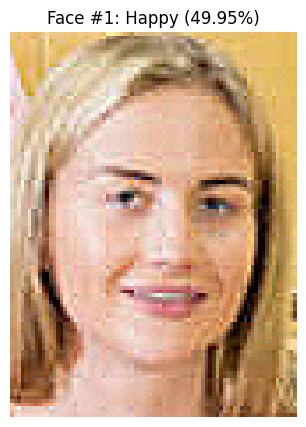

Saved enhanced cropped face 2 to /content/face_2.jpg


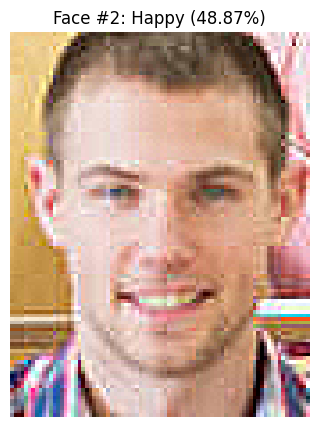

Saved enhanced cropped face 3 to /content/face_3.jpg


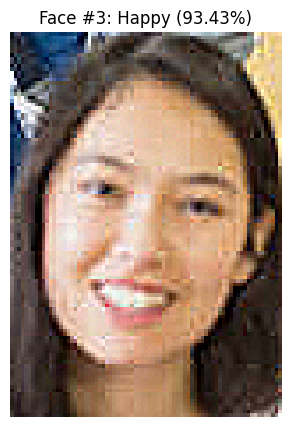

Saved enhanced cropped face 4 to /content/face_4.jpg


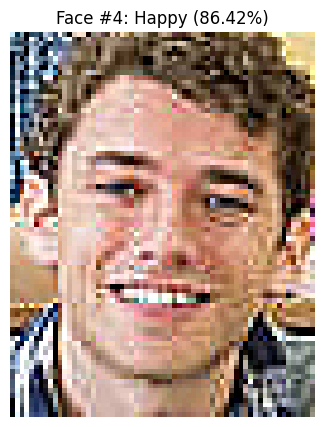

Saved enhanced cropped face 5 to /content/face_5.jpg


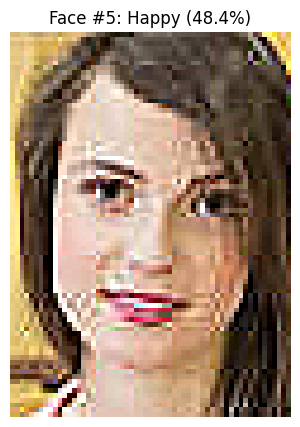

Saved enhanced cropped face 6 to /content/face_6.jpg


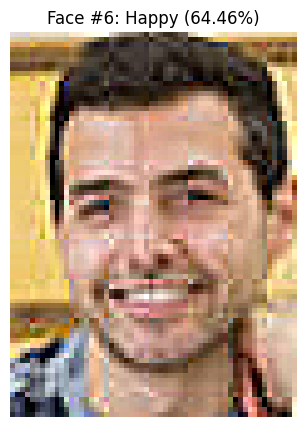

Saved enhanced cropped face 7 to /content/face_7.jpg


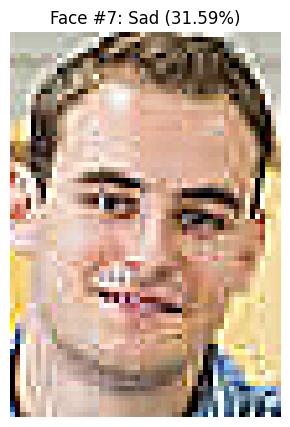

Saved enhanced cropped face 8 to /content/face_8.jpg


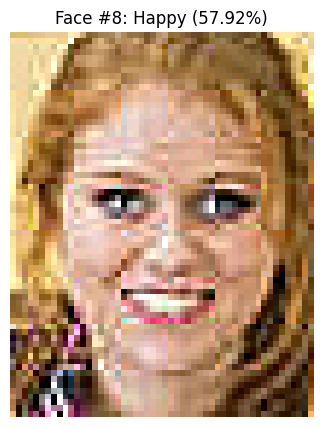

Saved enhanced cropped face 9 to /content/face_9.jpg


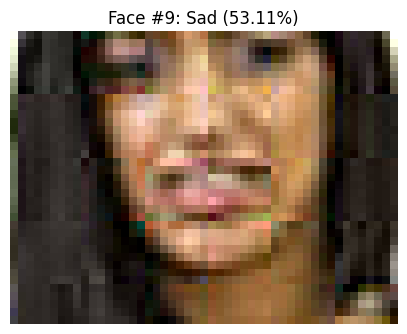

Total number of cropped faces: 9


In [ ]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Initialize MTCNN
try:
    mtcnn = MTCNN(keep_all=True, device=device)
except Exception as e:
    print(f"Error initializing MTCNN: {e}")
    raise

# Load emotion model
try:
    model = keras.models.load_model('/content/FER_model.h5')
    print(f"Model expects input shape: {model.input_shape}")
except Exception as e:
    print(f"Error loading emotion model: {e}")
    raise

# Emotion dictionary
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# Predict emotion function
def predict_emotion(face):
    try:
        face_gray = cv2.cvtColor(np.array(face), cv2.COLOR_RGB2GRAY)
        # Use high-quality interpolation for resizing
        face_resized = cv2.resize(face_gray, (48, 48), interpolation=cv2.INTER_LANCZOS4) / 255.0
        face_input = np.expand_dims(np.expand_dims(face_resized, -1), 0)
        prediction = model.predict(face_input, verbose=0)
        emotion_id = int(np.argmax(prediction))
        confidence = round(max(prediction[0]) * 100, 2)
        return (emotion_id, confidence)
    except Exception as e:
        print(f"Error predicting emotion: {e}")
        return (6, 0.0)

# Function to enhance image quality (sharpening)
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Load image
image_path = "/content/istockphoto-846331226-612x612 (1) (1).jpg"
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load image at {image_path}")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect faces
try:
    boxes, _, landmarks = mtcnn.detect(image_rgb, landmarks=True)
except Exception as e:
    print(f"Error during face detection: {e}")
    boxes, landmarks = None, None

cropped_faces = []

# Crop, enhance, and save faces
if boxes is not None:
    print(f"Detected {len(boxes)} faces in the image.")

    for i, box in enumerate(boxes):
        # Get bounding box coordinates
        x1, y1, x2, y2 = [int(coord) for coord in box]

        # Expand the bounding box by 20% to include more context
        width = x2 - x1
        height = y2 - y1
        expansion = 0.2  # 20% expansion
        x1 = max(0, x1 - int(width * expansion))  # Ensure not out of bounds
        y1 = max(0, y1 - int(height * expansion))
        x2 = min(image_rgb.shape[1], x2 + int(width * expansion))
        y2 = min(image_rgb.shape[0], y2 + int(height * expansion))

        # Crop face
        face = image_rgb[y1:y2, x1:x2]
        if face.size == 0:
            print(f"Warning: Face {i+1} crop is empty, skipping.")
            continue

        # Enhance the cropped face
        face_enhanced = sharpen_image(face)
        face_pil = Image.fromarray(face_enhanced)
        cropped_faces.append(face_pil)

        # Save cropped face with high quality
        face_path = f"/content/face_{i+1}.jpg"
        face_pil.save(face_path, quality=100)  # Max JPEG quality
        print(f"Saved enhanced cropped face {i+1} to {face_path}")

        # Predict emotion
        emotion_id, confidence = predict_emotion(face_pil)
        emotion = emotion_dict[emotion_id]

        # Display individual face with prediction
        plt.figure(figsize=(5, 5))
        plt.imshow(face_enhanced)
        plt.title(f"Face #{i+1}: {emotion} ({confidence}%)")
        plt.axis('off')
        plt.show()
else:
    print("No faces detected in the image.")
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image (No Faces Detected)')
    plt.show()

print(f"Total number of cropped faces: {len(cropped_faces)}")